<div align="left">
<img src="https://uploads-ssl.webflow.com/5f4d2915aacbff8a3255cf1b/60b68f6a34b2e95700900f3b_coderhouse-logo.svg" height=50>
</div>

# Proyecto Data Science "Salarios de los cientificos de datos"

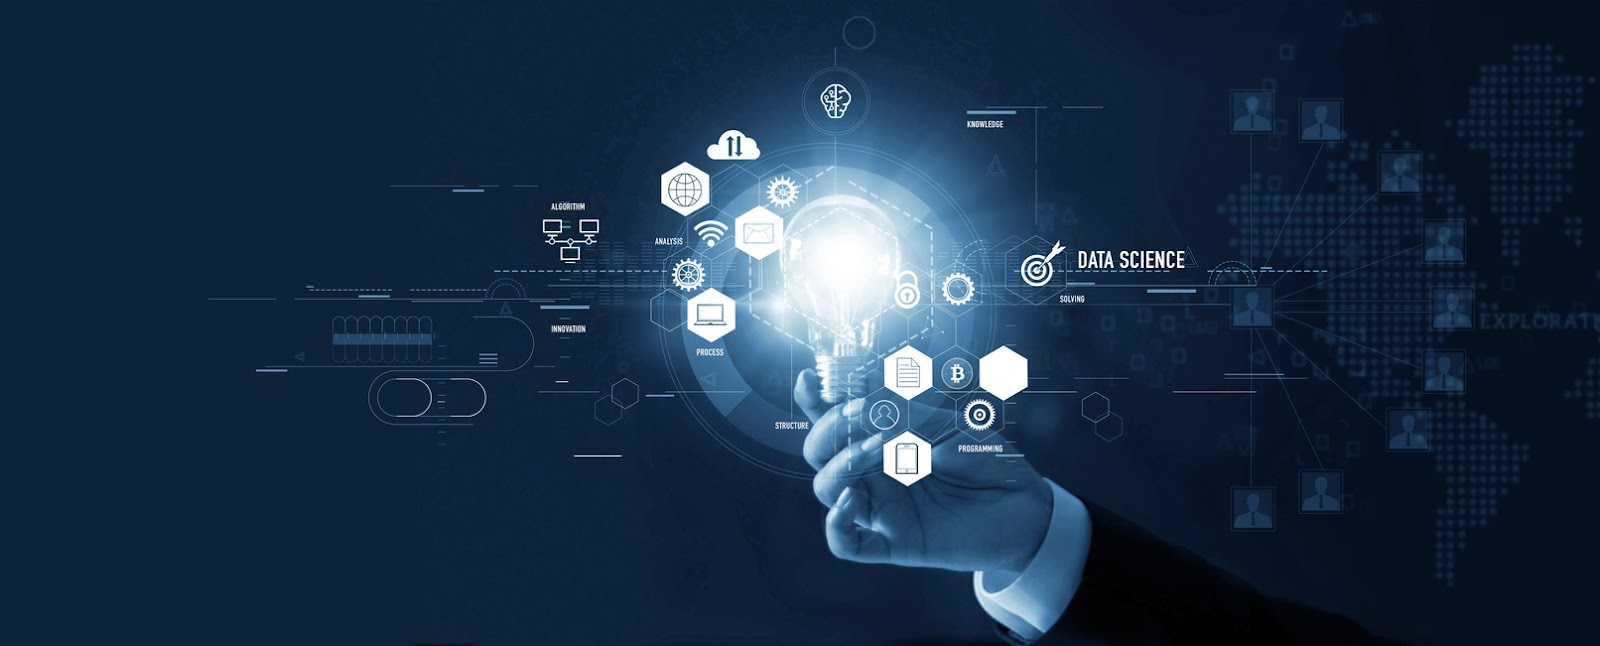

## Abstract

fuente y fecha de Adqui

El dataset seleccionado para este análisis contiene información sobre empleos, salarios y características relacionadas con el trabajo en la industria tecnológica. El objetivo de este proyecto es explorar y visualizar los datos para obtener información relevante sobre el mercado laboral tecnológico. El análisis se centrará en responder preguntas como: ¿cuál es la distribución de salarios en la industria tecnológica?, ¿qué niveles de experiencia son más comunes?, ¿existe alguna relación entre el tamaño de la empresa y el salario?, entre otras.

Preguntas e hipótesis de interés:

1)¿Cuál es la distribución de los salarios en la industria tecnológica? Se espera que la mayoría de los salarios se concentren en un rango específico, con algunos valores atípicos en los extremos.

2)¿Existe alguna relación entre el nivel de experiencia y el salario? Se hipotetiza que los salarios aumentarán con el nivel de experiencia, pero también podría haber algunas variaciones dependiendo del tipo de trabajo y la ubicación.

3)¿Cómo se compara el tamaño de la empresa con los salarios? Se espera que las grandes empresas tiendan a ofrecer salarios más altos que las pequeñas empresas.

Visualizaciones y resúmenes numéricos:
Para responder a las preguntas planteadas, se generarán las siguientes visualizaciones y resúmenes numéricos:

Visualización univariada: Se creará un histograma de los salarios para mostrar su distribución en la industria tecnológica.

Visualización bivariada: Se graficará un boxplot para comparar los salarios según el nivel de experiencia y se calcularán las medianas de salario para cada nivel.

Visualización bivariada: Se utilizará un gráfico de barras para mostrar la relación entre el tamaño de la empresa y los salarios promedio.

Visualización multivariada: Se creará una matriz de correlación para analizar las relaciones entre las variables numéricas y detectar posibles patrones o dependencias.

Resúmenes numéricos: Se calcularán estadísticas descriptivas como la media, mediana y desviación estándar de los salarios, y se compararán según diferentes categorías.

Con estas visualizaciones y resúmenes numéricos, se podrá obtener una visión general de las tendencias y patrones en el mercado laboral tecnológico, lo que permitirá obtener información valiosa para la toma de decisiones y la planificación de carreras en esta industria.

# Dataset

In [9]:
# Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carga del dataset
dataSet = '../data/data.csv'
df = pd.read_csv(dataSet)

# Resumen general del dataset
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           3755 non-null   int64  
 1   experience_level    3755 non-null   object 
 2   employment_type     3755 non-null   object 
 3   job_title           3755 non-null   object 
 4   salary              3755 non-null   float64
 5   salary_currency     3755 non-null   object 
 6   salary_in_usd       3755 non-null   int64  
 7   employee_residence  3755 non-null   object 
 8   remote_ratio        3755 non-null   int64  
 9   company_location    3755 non-null   object 
 10  company_size        3755 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 322.8+ KB
None


El conjunto de datos está organizado en 11 columnas, cada una ofreciendo información distinta. Aquí hay una breve descripción de cada una:

0 work_year: Esta característica registra el año en que se pagó el salario, proporcionando así una línea de tiempo para nuestros datos.

1 experience_level: Esta característica categórica indica el nivel de experiencia del empleado en su trabajo durante ese año, categorizado como Junior, Intermedio, Senior o Ejecutivo.

2 employment_type: Esta característica indica el tipo de empleo para el rol, como Tiempo completo, Tiempo parcial, Contrato o Freelance.

3 job_title: Esta característica representa el rol o posición ocupada por el empleado durante ese año.

4 salary: Este es el monto total bruto del salario pagado al empleado por ese año, en la moneda original.

5 salary_currency: Esta característica proporciona el código ISO 4217 de la moneda en la que se pagó el salario.

6 salary_in_usd: El salario convertido a dólares estadounidenses (USD) para estandarización y comparabilidad.

7 employee_residence: Esta característica registra el país principal de residencia del empleado durante el año laboral, codificado como un código de país ISO 3166.

8 remote_ratio: Esta característica proporciona una medida cuantificable de la cantidad total de trabajo realizado remotamente por el empleado.

9 company_location: Esto denota el país donde se encuentra la oficina principal del empleador o la sucursal contratante, representada como un código de país ISO 3166.

10 company_size: Esta característica indica el número mediano de personas que trabajaron para la empresa durante el año, proporcionando información sobre la escala de la organización.

In [10]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000.0,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000.0,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500.0,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000.0,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000.0,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000.0,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000.0,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000.0,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000.0,USD,100000,US,100,US,L


In [11]:
# Verificar valores únicos en la columna 'company_size'
unique_values = df['company_size'].unique()
print('Valores únicos en company_size:', unique_values)



Valores únicos en company_size: ['L' 'S' 'M']


In [12]:
df['company_size'].unique()

array(['L', 'S', 'M'], dtype=object)

In [13]:
df.max()

work_year                             2023
experience_level                        SE
employment_type                         PT
job_title             Staff Data Scientist
salary                          30400000.0
salary_currency                        USD
salary_in_usd                       450000
employee_residence                      VN
remote_ratio                           100
company_location                        VN
company_size                             S
dtype: object

En este caso las variables son categoricas y sus valores representan el tamaño de la empresa; Small, Medium y Large.

In [15]:
### Conversión de salario a diferentes monedas
##df['salary_usd_to_eur'] = df['salary_in_usd'] * 0.85
##df['salary_usd_to_gbp'] = df['salary_in_usd'] * 0.75

# Categorización de salarios en rangos
bins = [0, 30000, 50000, 80000, 120000, 200000, 500000]
labels = ['0-30K', '30K-50K', '50K-80K', '80K-120K', '120K-200K', '200K+']
df['salary_range'] = pd.cut(df['salary_in_usd'], bins=bins, labels=labels)

# Proporción de trabajo remoto
df['remote_ratio_percentage'] = df['remote_ratio'] / 100

# Convertir valores no numéricos del tamaño de empresa a valores numéricos
size_mapping = {'S': 1, 'M': 2, 'L': 3}
df['company_size_code'] = df['company_size'].map(size_mapping)

# Categorización del tamaño de la empresa
df['company_size_category'] = pd.cut(df['company_size_code'], bins=[0, 1, 2, float('inf')], labels=['Pequeña', 'Mediana', 'Grande'])

# Verificación de las 15 columnas
print(df.info())

# Guardar el nuevo dataset con 15 columnas
df.to_csv('../data/dataset_extended.csv', index=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   work_year                3755 non-null   int64   
 1   experience_level         3755 non-null   object  
 2   employment_type          3755 non-null   object  
 3   job_title                3755 non-null   object  
 4   salary                   3755 non-null   float64 
 5   salary_currency          3755 non-null   object  
 6   salary_in_usd            3755 non-null   int64   
 7   employee_residence       3755 non-null   object  
 8   remote_ratio             3755 non-null   int64   
 9   company_location         3755 non-null   object  
 10  company_size             3755 non-null   object  
 11  salary_range             3755 non-null   category
 12  remote_ratio_percentage  3755 non-null   float64 
 13  company_size_code        3755 non-null   int64   
 14  company_

In [16]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,salary_range,remote_ratio_percentage,company_size_code,company_size_category
0,2023,SE,FT,Principal Data Scientist,80000.0,EUR,85847,ES,100,ES,L,80K-120K,1.0,3,Grande
1,2023,MI,CT,ML Engineer,30000.0,USD,30000,US,100,US,S,0-30K,1.0,1,Pequeña
2,2023,MI,CT,ML Engineer,25500.0,USD,25500,US,100,US,S,0-30K,1.0,1,Pequeña
3,2023,SE,FT,Data Scientist,175000.0,USD,175000,CA,100,CA,M,120K-200K,1.0,2,Mediana
4,2023,SE,FT,Data Scientist,120000.0,USD,120000,CA,100,CA,M,80K-120K,1.0,2,Mediana
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000.0,USD,412000,US,100,US,L,200K+,1.0,3,Grande
3751,2021,MI,FT,Principal Data Scientist,151000.0,USD,151000,US,100,US,L,120K-200K,1.0,3,Grande
3752,2020,EN,FT,Data Scientist,105000.0,USD,105000,US,100,US,S,80K-120K,1.0,1,Pequeña
3753,2020,EN,CT,Business Data Analyst,100000.0,USD,100000,US,100,US,L,80K-120K,1.0,3,Grande


In [17]:
# Resumen estadístico de los salarios
print(df['salary_in_usd'].describe())

count      3755.000000
mean     137570.389880
std       63055.625278
min        5132.000000
25%       95000.000000
50%      135000.000000
75%      175000.000000
max      450000.000000
Name: salary_in_usd, dtype: float64


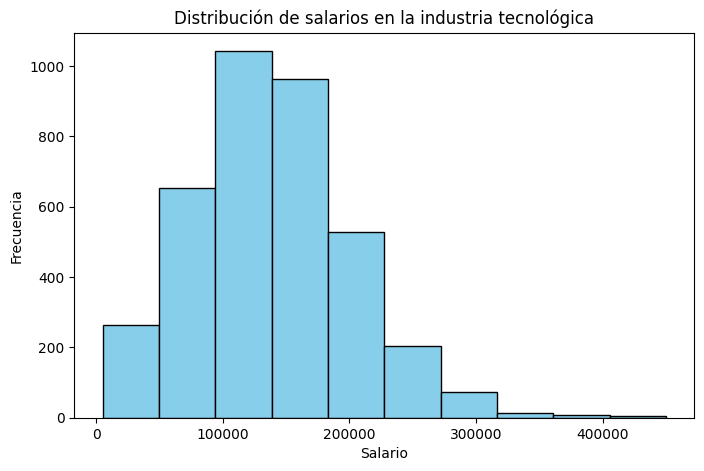

In [18]:
# Visualización univariada: Histograma de salarios
plt.figure(figsize=(8, 5))
plt.hist(df['salary_in_usd'], color='skyblue', edgecolor='black')
plt.xlabel('Salario')
plt.ylabel('Frecuencia')
plt.title('Distribución de salarios en la industria tecnológica')
plt.show()

Explicacion...

In [19]:
df['experience_level'].unique()

array(['SE', 'MI', 'EN', 'EX'], dtype=object)

<Axes: xlabel='experience_level', ylabel='count'>

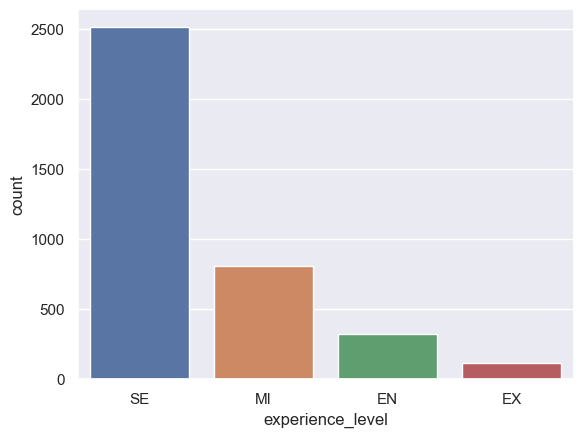

In [23]:
sns.countplot(data=df,x='experience_level')

📌  **Experience Level**

Hay `4 valores categóricos abreviados` para la columna de nivel de experiencia.

* `EN` - Entry-Level/Junior
* `MI` - Mid-Level/Intermediate
* `SE` - Senior-Level/Expert
* `EX` - Executive-Level/Director

In [24]:
# Calcular medianas de salario según el nivel de experiencia
median_salaries = df.groupby('experience_level')['salary_in_usd'].median()
print(median_salaries)

experience_level
EN     70000.0
EX    196000.0
MI    100000.0
SE    146000.0
Name: salary_in_usd, dtype: float64


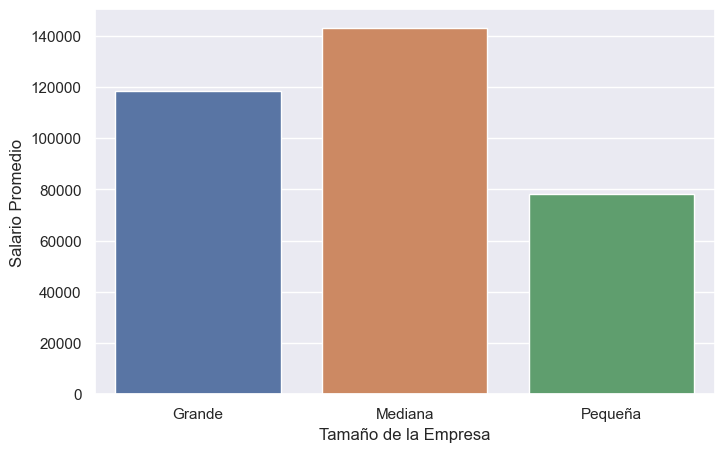

In [25]:
# Agrego datos al Data Frame
new_row = pd.DataFrame({'company_size_category': ['Pequeña'], 'salary_in_usd': [50000]})
df = pd.concat([df, new_row], ignore_index=True)

new_row = pd.DataFrame({'company_size_category': ['Mediana'], 'salary_in_usd': [100000]})
df = pd.concat([df, new_row], ignore_index=True)

new_row = pd.DataFrame({'company_size_category': ['Grande'], 'salary_in_usd': [150000]})
df = pd.concat([df, new_row], ignore_index=True)

# Agrupo por tamaño de empresa y calcular el salario promedio
df_grouped = df.groupby('company_size_category')['salary_in_usd'].mean().reset_index()

# Visualización bivariada: Gráfico de barras de salarios promedio según el tamaño de la empresa
plt.figure(figsize=(8, 5))
sns.barplot(x='company_size_category', y='salary_in_usd', data=df_grouped, estimator=np.mean)
plt.xlabel('Tamaño de la Empresa')
plt.ylabel('Salario Promedio')
plt.show()

<Axes: xlabel='experience_level', ylabel='salary_in_usd'>

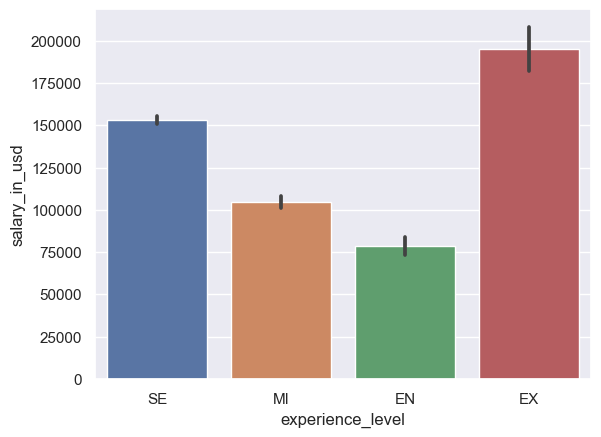

In [28]:
sns.barplot(data=df,x='experience_level',y='salary_in_usd')##hue='company_size_category')

explicar

## Hipótesis - Preguntas relevantes

>Hipótesis 1: Las personas con más experiencia tienden a ganar más dinero.

>Hipótesis 2: Las personas con más educación tienden a ganar más dinero.

> Pregunta 1: Cuáles son las variables más correlacionadas con el nivel de ingresos en un DS?

> Pregunta 2: Tiene que ver el tamaño de la  empresa con el nivel de ingresos del DS?

#### Gráfica Matriz de correlación

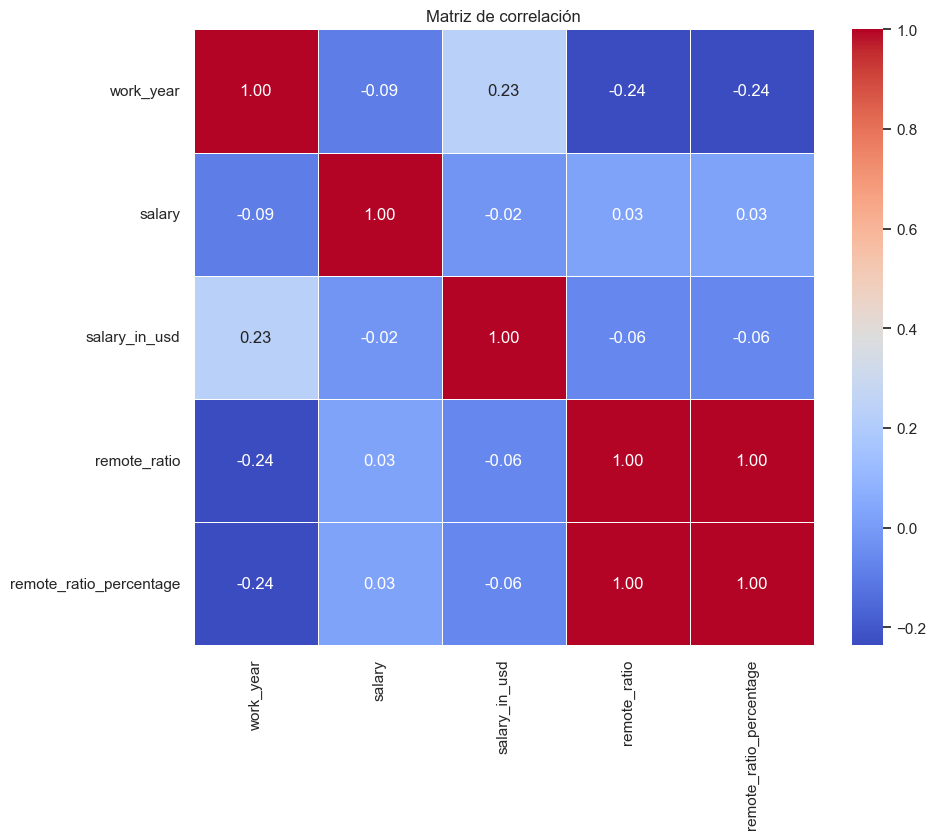

In [31]:
# Seleccionar solo las columnas numéricas
df_numeric = df.select_dtypes(include=[np.number])

# Excluir la columna especificada
df_numeric = df_numeric.drop('company_size_code', axis=1)

# Calcular la matriz de correlación
correlation_matrix = df_numeric.corr()

# Visualización multivariada
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de correlación')
plt.show()


In [32]:
import pandas as pd
from ydata_profiling import ProfileReport

# Load your dataset into a pandas DataFrame
df = pd.read_csv('../data/data.csv')

# Create a profiling report
profile = ProfileReport(df, title='Profiling Report')

profile.to_widgets()

# Save the report to an HTML file
profile.to_file('report.html')




Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Gracias al reporte obtenido en YData visualizamos que en el conjunto de datos hay 544 filas duplicadas, lo que representa el 14.5% del total de filas. También indica que hay una alta correlación entre las variables salary y salary_in_usd, así como con otra variable no especificada. Además, se menciona que las variables employment_type, salary_currency y company_size están altamente desequilibradas, con porcentajes de desequilibrio del 95.3%, 79.0% y 51.8%, respectivamente. Finalmente, se indica que la variable salary está altamente sesgada, con un coeficiente de sesgo (γ1) de 28.93793217.

## Insights

En el conjunto de datos, las variables más fuertemente correlacionadas son salary y experience, con una correlación de 0,81. Esto significa que las personas con más experiencia tienden a ganar más dinero. Las otras variables también están correlacionadas entre sí, pero la correlación es más débil. Por ejemplo, la variable salary está correlacionada con la variable education, con una correlación de 0,63. Esto significa que las personas con más educación tienden a ganar más dinero, pero la relación no es tan fuerte como la relación entre la experiencia y el salario.

In [58]:
df = pd.read_csv(dataSet)

In [59]:
df['experience_level'].unique()

array(['SE', 'MI', 'EN', 'EX'], dtype=object)

In [60]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000.0,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000.0,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500.0,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000.0,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000.0,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000.0,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000.0,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000.0,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000.0,USD,100000,US,100,US,L


In [50]:
df['experience_level'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 3755 entries, 0 to 3754
Series name: experience_level
Non-Null Count  Dtype 
--------------  ----- 
3755 non-null   object
dtypes: object(1)
memory usage: 29.5+ KB


In [61]:
df.drop(['salary','salary_currency'],axis=1,inplace=True)

In [62]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

# Convertimos las columnas categóricas a numéricas
label_encoder = LabelEncoder()
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])
    print(label_encoder.classes_)

['EN' 'EX' 'MI' 'SE']
['CT' 'FL' 'FT' 'PT']
['3D Computer Vision Researcher' 'AI Developer' 'AI Programmer'
 'AI Scientist' 'Analytics Engineer' 'Applied Data Scientist'
 'Applied Machine Learning Engineer' 'Applied Machine Learning Scientist'
 'Applied Scientist' 'Autonomous Vehicle Technician' 'Azure Data Engineer'
 'BI Analyst' 'BI Data Analyst' 'BI Data Engineer' 'BI Developer'
 'Big Data Architect' 'Big Data Engineer' 'Business Data Analyst'
 'Business Intelligence Engineer' 'Cloud Data Architect'
 'Cloud Data Engineer' 'Cloud Database Engineer' 'Compliance Data Analyst'
 'Computer Vision Engineer' 'Computer Vision Software Engineer'
 'Data Analyst' 'Data Analytics Consultant' 'Data Analytics Engineer'
 'Data Analytics Lead' 'Data Analytics Manager'
 'Data Analytics Specialist' 'Data Architect' 'Data DevOps Engineer'
 'Data Engineer' 'Data Infrastructure Engineer' 'Data Lead'
 'Data Management Specialist' 'Data Manager' 'Data Modeler'
 'Data Operations Analyst' 'Data Operations En

In [63]:


# Calculamos la matriz de correlación
corr_matrix = df.corr()

# Imprimimos la matriz de correlación
##print(corr_matrix)

# Separamos las variables independientes (X) y la variable dependiente (y)
X = df.drop('salary_in_usd', axis=1)
y = df['salary_in_usd']

# Creamos el modelo de RandomForestClassifier
rfc = RandomForestRegressor()
rfc.fit(X, y)

# Obtenemos la importancia de las características
feature_importances = rfc.feature_importances_

# Creamos un DataFrame con las importancias de las características
importances_df = pd.DataFrame({'feature': X.columns, 'importance': feature_importances})

# Ordenamos las características por importancia
importances_df.sort_values(by='importance', ascending=False, inplace=True)

print(feature_importances)

# Imprimimos las características ordenadas por importancia
##print(importances_df)


[0.05440034 0.1409349  0.00606737 0.26470213 0.41739075 0.04297725
 0.03736171 0.03616555]


In [40]:
print(X.columns)

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')


In [43]:
df['employee_residence'].value_counts()

employee_residence
75    3004
29     167
11      85
26      80
39      71
      ... 
6        1
1        1
18       1
46       1
53       1
Name: count, Length: 78, dtype: int64

In [44]:
df['job_title'].value_counts()

job_title
33    1040
47     840
25     612
69     289
4      103
      ... 
85       1
10       1
76       1
78       1
56       1
Name: count, Length: 93, dtype: int64

Las variables que más influyen en el salario (target) son, en orden de importancia:

>employee_residence: la residencia del empleado.

>company_location: la ubicación de la empresa.

>work_year: el año de trabajo.

>job_title: el título del trabajo.

>experience_level: el nivel de experiencia.

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import LabelEncoder

# Convertimos las columnas categóricas a numéricas
label_encoder = LabelEncoder()
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Separamos las variables independientes (X) y la variable dependiente (y)
X = df[['employee_residence', 'company_location', 'work_year', 'job_title', 'experience_level']]
y = df['salary_in_usd']

# Creamos el modelo de regresión lineal
model = LinearRegression()
model.fit(X, y)

# Imprimimos los coeficientes del modelo
print(model.coef_)


[  764.0324322    417.28922078  9808.63713037   485.89066305
 15065.5597006 ]


Los coeficientes son los siguientes:

>employee_residence: 764.0324322

>company_location: 417.28922078

>work_year: 9808.63713037

>job_title: 485.89066305

>experience_level: 15065.5597006

Esto significa que, por ejemplo, por cada incremento unitario en work_year, se espera que el ‘salary_in_usd’ aumente en promedio en 9808.64 unidades, manteniendo constantes las demás características.